In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import glob
from os import path

In [2]:
%matplotlib inline

In [3]:
!ls data/NYT/

NYT_bicultural.json	     NYT_multicultural.json
NYT_biethnic.json	     NYT_multiethnic.json
NYT_biracial.json	     NYT_multiracial.json
NYT_cultural pluralism.json  NYT_other ethnicity.json
NYT_interracial.json	     NYT_other race.json
NYT_mixed ethnicity.json     NYT_polyculturalism.json
NYT_mixed race.json	     NYT_polycultural.json
NYT_monocultural.json	     NYT_polyethnic.json
NYT_monoracial.json	     NYT_polyracial.json
NYT_multiculturalism.json


In [18]:
def load_nyt_json(filename):
    obj = json.load(open(filename))
    words = obj["graph_data"]
    assert len(words) == 1
    only_word = words[0]
    term1 = only_word["term"]
    term2 = path.basename(filename).split(".")[0]
    assert term1 == term2

    df = pd.DataFrame.from_records(only_word["data"])
    df = df.rename(columns={"total_articles_published": "Total", "article_matches": term1})
    database = df[["Total", term1, "year"]]
    return term1, database

In [29]:
def load_nyt_database():
    word, database = load_nyt_json("data/NYT_new/bicultural.json")

    for file in glob.glob("data/NYT_new/*json"):
      word, df = load_nyt_json(file)
      if word == "bicultural": continue
      df.drop("Total", 1, inplace=True)
      df = df.rename(columns={"article_matches": word})
      database = pd.merge(database, df, on="year", how="outer")

    database.set_index("year", inplace=True)
    values = (database.values.T / database.Total.values).T
    values[:, 0] = database.Total.values
    database_norm = pd.DataFrame(data=values, columns=database.columns, index=database.index)
    return database_norm

In [30]:
database_norm = load_nyt_database()

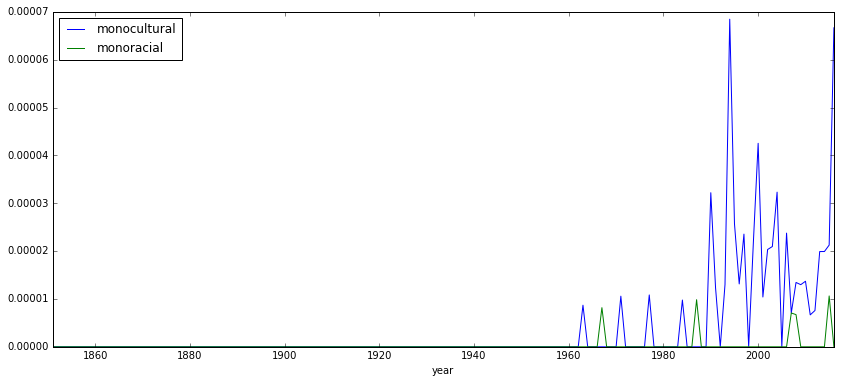

In [31]:
_ = database_norm[['monocultural', 'monoracial']].plot(figsize=(14,6))

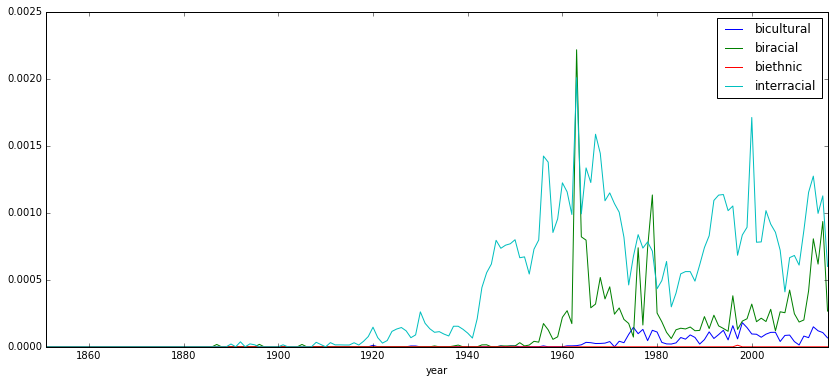

In [32]:
_ = database_norm[['bicultural', 'biracial', 'biethnic', 'interracial']].plot(figsize=(14,6))

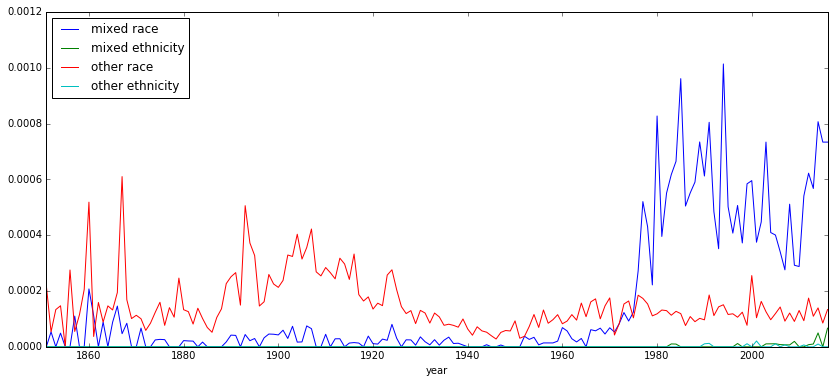

In [33]:
_ = database_norm[['mixed race', 'mixed ethnicity', 'other race', 'other ethnicity']].plot(figsize=(14,6))

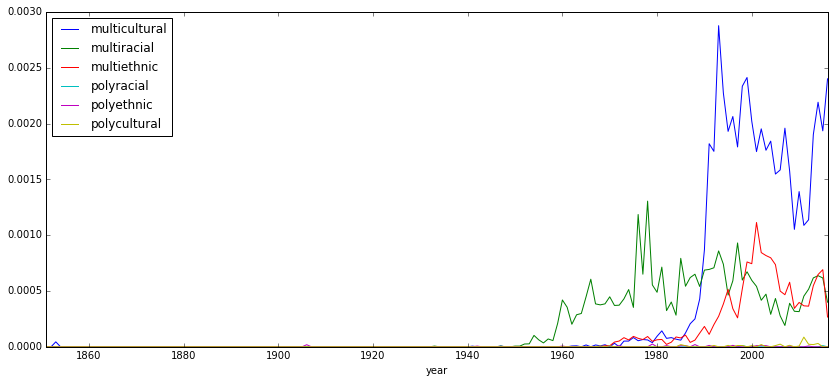

In [34]:
_ = database_norm[['multicultural', 'multiracial', 'multiethnic', 'polyracial', 'polyethnic', 'polycultural']].plot(figsize=(14,6))

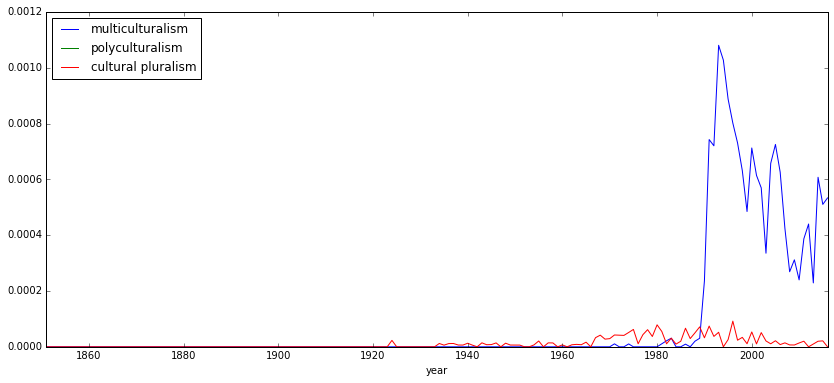

In [35]:
_ = database_norm[['multiculturalism', 'polyculturalism', 'cultural pluralism']].plot(figsize=(14,6))

polyculturalism has no frequency in NYT

# To Do

1. Fix data 
1. Smoothen lines
1. Key: top left -- NYT (dashed line), Google Books 